Forecast With Simple XGBoost Model in Python

Import data from CSV file and use XGBoost library's machine learning approach to build a robust model.

In this example, we will be using XGBoost, a machine learning module in Python that's popular and is used a lot for regression and forecasting tasks. The code here will give you a quick introduction to XGBoost, show you how to train an XGBoost model, and then predict values based on that model.

Dataset
We will be using a dataset that encapsulates the carbon dioxide emissions generated from burning coal for producing electricity power in the United States of America between 1973 and 2016. Using XGBoost, we will try to predict the carbon dioxide emissions in jupyter notebook for the next few years.

What's XGBoost, really?
XGBoost is an optimized distributed gradient boosting library designed to be quick and effective. XGBoost can equip you to build a more powerful model using decision trees. XGBoost considers the leaves of the current decision tree and questions whether turning that leaf into a new “if” statement with separate predictions would benefit the model. The benefit to the model depends on the “if” statement chosen and which leaf it’s placed on—this can be determined using the gradient of the loss. Single decision trees can be inaccurate and may suffer from high variance, combining the output of a large number of these weak learners can actually lead to strong learner, resulting in better predictions and less variance.

Note - Install python library - xgboost using pip install xgboost

Importing Libraries 
The import statement is the most common way of invoking the libraries in Python. In this example, we will be making use of pandas, numpy, seaborn, matplotlib, sklearn and XGBoost libraries. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import xgboost as xgb
plt.style.use('seaborn-bright')

In [2]:
#Read the dataset and print the top 5 elements of the dataset
data = pd.read_csv('CO2.csv')
data.head(5)

,YYYYMM,Value
0,197301,72.076
1,197302,64.442
2,197303,64.084
3,197304,60.842
4,197305,61.798


We use Pandas to import the CSV file. We notice that the dataframe contains a column 'YYYYMM' that needs to be separated into 'Year' and 'Month' column. In this step, we will also remove any null values that we may have in the dataframe. Finally, we will retrieve the last five elements of the dataframe to check if our code worked. And it did!

In [3]:
data['Month'] = data.YYYYMM.astype(str).str[4:6].astype(float)
data['Year'] = data.YYYYMM.astype(str).str[0:4].astype(float)
data.drop(['YYYYMM'], axis=1, inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.tail(5)

,Value,Month,Year
518,72.840,3.0,2016.0
519,71.410,4.0,2016.0
520,82.510,5.0,2016.0
521,115.772,6.0,2016.0
522,135.958,7.0,2016.0


In this step, we will quickly check if all the column values have data type - float and see the shape of dataframe.

In [4]:
# check for data type
print(data.dtypes)

Value    float64
Month    float64
Year     float64
dtype: object


In [5]:
# check the number of instances
print(data.shape)

(523, 3)


We will now separate the target variable - 'Value' and rest of the variables using .iloc to subset the data. Next, the dataset has to be converted into an optimized data structure called Dmatrix that XGBoost supports. 

In [6]:
y, X = data.loc[:,'Value'].values, data.loc[:,['Month', 'Year']].values
data_dmatrix = xgb.DMatrix(X,label=y)

Before we move on, we must create the train and test set using the train_test_split function from sklearn's model_selection module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a random_state is also assigned.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

For this particular dataframe, we'll use the XGBRegressor class of the xgboost package that we can define with its default parameters. Please feel encouraged to add new parameters or change the value of existing ones to improve these results.

In [8]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

After we have trained the model, let us apply the cross-validation method to evaluate the training score. Our training score is coming out to be 0.98, which is pretty impressive.

In [9]:
#After training the model, we'll check the model training score.
scores = cross_val_score(reg_mod, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.98


Next, we can predict test data, then check the prediction accuracy. 

In [10]:
reg_mod.fit(X_train,y_train)

predictions = reg_mod.predict(X_test)

Here, we will use common statistical accuracy metrics such as RMSE - Root Mean Squared error and R-Squared Score.

In [11]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 4.948449


In [12]:
from sklearn.metrics import r2_score
r2 = np.sqrt(r2_score(y_test, predictions))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.987675


As you can see, the these statistical metrics have reinstated our confidence about this model. 
RMSE ~ 4.95
R-Squared Score ~ 98.8%
Now, let's visualize the original data set using the seaborn library.

<AxesSubplot:xlabel='Year', ylabel='Value'>

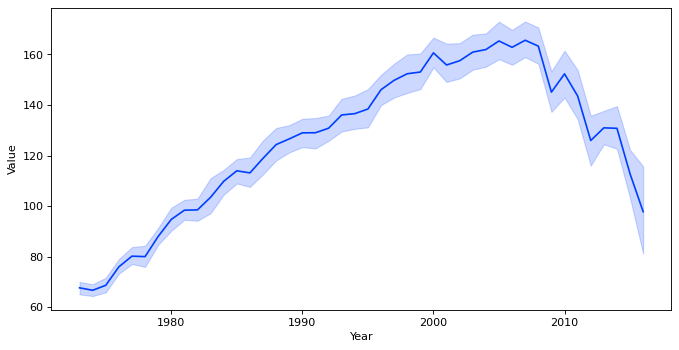

In [13]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Year', y='Value', data=data)

Finally, we'll visualize the original and predicted test data in a plot to compare how they match up with each other.

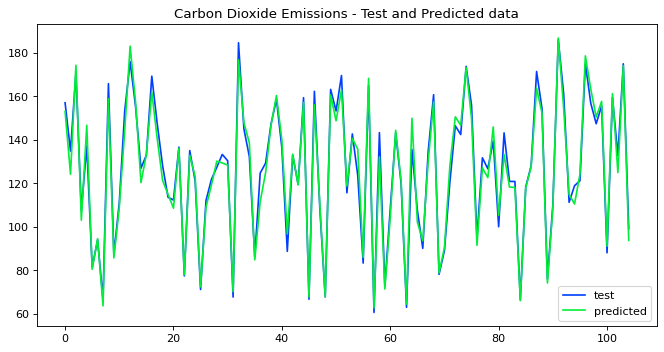

In [14]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

Finally, the last piece of code will print the forecasted carbon dioxide emissions until 2025.

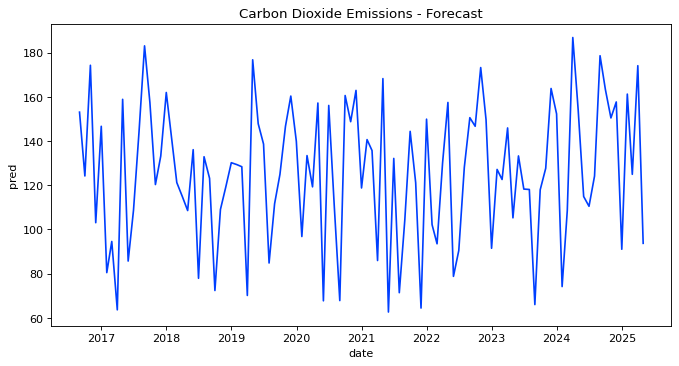

In [15]:
plt.figure(figsize=(10, 5), dpi=80)
df=pd.DataFrame(predictions, columns=['pred']) 
df['date'] = pd.date_range(start='8/1/2016', periods=len(df), freq='M')
sns.lineplot(x='date', y='pred', data=df)
plt.title("Carbon Dioxide Emissions - Forecast")
plt.show()

This was a walk-through tutorial for anybody who is starting with XGBoost and wants to adopt this brilliant machine learning approach to solve classification and regression problems. 